

# Project: Investigate a Dataset (The Movie Database (TMDb))

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> <font size="3">I choose the TMDb movie dataset. This dataset have information about 10,000 movie and it contains 10866 rows and 21 columns.</font>
>
### The Research Questions

> 1) What is the relationship between profit and runtime ?
>
> 2) What is the most voting rate used for movies to vote?
>
> 3) What genre has the largest number of movies?

In [1]:
#import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load the dataset
df_movie=pd.read_csv('tmdb-movies.csv')
df_movie

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [3]:
df_movie.shape

(10866, 21)

> <font size="3">The dataset contains 10866 rows and 21 columns.</font> 

In [4]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> <font size="3">There is some missing values.</font> 

In [5]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




## Data Cleaning 

***

> #### <font size="3"> First, remove the unused columns.</font>
>
> #### <font size="3"> Second, remove duplicate rows from the dataset.</font>
>
> #### <font size="3"> Third, remove the zero value of budget and revenue.</font>
> 
> #### <font size="3"> Finally, clean the null values.</font>

***





### 1. Remove the unused columns

In [6]:
# Dropp the unused columns that are not needes in the analysis process

df_movie.drop(['imdb_id','cast','homepage','director','tagline','keywords','overview'], axis=1,inplace=True)

# Check if the columns are dropped
df_movie.head()

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### 2. Remove duplicate rows from the dataset

In [7]:
# Check if there duplicates in the dataset
sum(df_movie.duplicated())

1

In [8]:
# Drop the duplicates
df_movie.drop_duplicates(inplace=True)

# Check if the duplicate is dropped
sum(df_movie.duplicated())

0

### 3. Remove the zero value of budget and revenue

In [9]:
# Check the zero values
df_movie.isin([0]).sum()

id                         0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [10]:
# Replace the zero values with NAN then drop it with the null values 
df_movie= df_movie.replace(0, np.nan)

### 4. Clean the null values

In [11]:
# Drop all null values 
df_movie.dropna(inplace=True)

In [12]:
# Check if the zero values are dropped
df_movie.isin([0]).sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [13]:
# Check if the null values are dropped and everything is good
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3808 non-null   int64  
 1   popularity            3808 non-null   float64
 2   budget                3808 non-null   float64
 3   revenue               3808 non-null   float64
 4   original_title        3808 non-null   object 
 5   runtime               3808 non-null   float64
 6   genres                3808 non-null   object 
 7   production_companies  3808 non-null   object 
 8   release_date          3808 non-null   object 
 9   vote_count            3808 non-null   int64  
 10  vote_average          3808 non-null   float64
 11  release_year          3808 non-null   int64  
 12  budget_adj            3808 non-null   float64
 13  revenue_adj           3808 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 446.2+ KB


> <font size="3"> The dataset after cleaning contains 3808 rows and 14 columns </font>

<a id='eda'></a>
## Exploratory Data Analysis


***

### Research Question 1 

### What is the relationship between profit and runtime ?
***

In [14]:
# Calculate the profit using revenue and budget 

movie_profit= df_movie['revenue']- df_movie['budget']

# Add the profit as a new column
df_movie['movie_profit'] = movie_profit 
df_movie.head()

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


Text(0.5, 1.0, 'Relationship between profit and runtime')

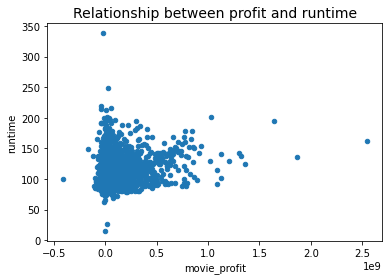

In [15]:
# Use scatter plot to see the relation between profit and runtime 
df_movie.plot(x='movie_profit', y='runtime',kind='scatter')
plt.title("Relationship between profit and runtime",fontsize = 14)

> <font size="3"> We can see here the relation between profit and runtime is a positive correlation and with a few outliers points </font>

***

### Research Question 2

### What is the most voting rate used for movies to vote?
***

Text(0.5, 1.0, 'Most voting rate used ')

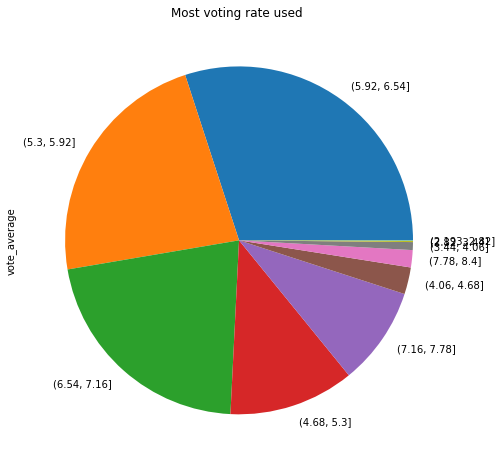

In [16]:
# Use pie plot to distribution the vote
df_movie['vote_average'].value_counts(bins=10).plot(kind='pie',figsize=(8,8))
plt.title("Most voting rate used ")

> <font size="3"> We can see here the most voting rate used to vote for the movies is (5.92, 6.54)</font>

***

### Research Question 3

### What genre has the largest number of movies?
***

In [17]:
# Define a function that will split the "|" in column

def separate(c):
    
    column_split = df_movie[c].str.cat(sep = '|')
    split = pd.Series(column_split.split('|'))
    
    # Count and return the number of movies in each genre
    data_count = split.value_counts(ascending=False)
    return data_count

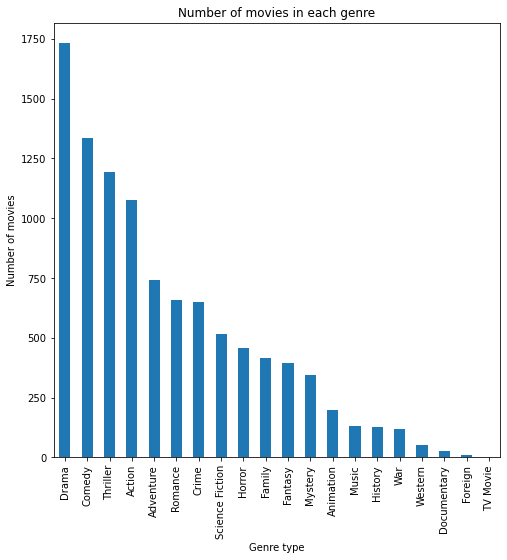

In [18]:
# Use bar plot to see the genre distribution 

separate("genres").plot(kind='bar',x='genres',y='profit',figsize=(8,8));
plt.title("Number of movies in each genre");
plt.xlabel('Genre type');
plt.ylabel("Number of movies");

> <font size="3"> We can see here the Drama genre has the largest number of movies </font>

<a id='conclusions'></a>
## Conclusions


> <font size="3"> In conclusion, I started discovering the dataset. Then I did data cleaning to I can handle with data in a good way.</font>
>
> <font size="3"> Next part was about exploring the data. I described the relationship between profit and runtime, which is a positive correlation. 
Also, the most voting rate used for movies to vote was (5.92, 6.54).
Finally, I observed the Drama genre have the largest number of movies, following by Comedy, Thriller and Action. </font>
>
>
>
> <font size="3"> About the Limitation: 
In the budget and revenue, there were a lot of zeros values and had to remove all the zeros.
I had to split the data separated by '|' in a new function to be easy to handle with them. </font>